In [1]:
import os
import warnings

import numpy as np
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
tags = pd.read_excel("../data/tags/tags.xlsx")

In [3]:
tags_dict = {}
for i in range(len(tags)):
    tags_dict[f"{tags.loc[i, 'Tags']}"] = tags.loc[i, 'Definition']

In [4]:
df = pd.read_csv("../data/interim/economic_dataset.csv")

In [5]:
df

,DATE,A091RC1Q027SBEA,A939RX0Q048SBEA,BOGMBASE,CCSA,CORESTICKM159SFRBATL,CPIAUCSL,CPILFESL,DEXUSEU,DGS10,...,T10Y2Y,TOTRESNS,UNEMPLOY,UNRATE,VIXCLS,W825RC1,WPU061,WPU0911,WPU10170502,WPU101707
0,1947-01-31,5.352,15248.0,NaN,NaN,NaN,21.480,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.500,20.100,NaN,NaN
1,1947-02-28,5.352,15248.0,NaN,NaN,NaN,21.620,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,22.700,20.100,NaN,NaN
2,1947-03-31,5.352,15248.0,NaN,NaN,NaN,22.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23.000,20.600,NaN,NaN
3,1947-04-30,5.360,15139.0,NaN,NaN,NaN,22.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23.600,21.100,NaN,NaN
4,1947-05-31,5.360,15139.0,NaN,NaN,NaN,21.950,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23.300,21.200,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
923,2023-12-31,1025.796,67513.0,5827400.0,1802400.0,4.554396,308.742,313.209,1.090940,4.020000,...,-0.437000,3492.0,6268.0,3.7,12.718500,22.9,300.512,205.776,175.3,413.808
924,2024-01-31,1059.235,67672.0,5843700.0,1782750.0,4.603922,309.685,314.438,1.089890,4.058095,...,-0.264762,3507.0,6124.0,3.7,13.388636,22.6,290.946,209.264,175.3,433.171
925,2024-02-29,1059.235,67672.0,5896900.0,1797250.0,4.403102,311.054,315.565,1.079300,4.207500,...,-0.336500,3567.7,6458.0,3.9,13.980476,22.8,296.303,210.580,175.3,454.090
926,2024-03-31,1059.235,67672.0,5883000.0,1801400.0,4.509212,312.230,316.698,1.087019,4.208500,...,-0.379500,3543.1,6429.0,3.8,13.787500,22.8,298.280,215.883,175.3,396.888


In [6]:
df_to_be_filtered = df.iloc[:, 1:]

In [7]:
df_to_be_filtered.fillna(method="ffill", inplace=True)
df_to_be_filtered.fillna(method="bfill", inplace=True)

In [8]:
def multicollinearity_check(X, thresh=5.0):
    data_type = X.dtypes
    # print(type(data_type))
    int_cols = X.select_dtypes(
        include=[
            "int",
            "int16",
            "int32",
            "int64",
            "float",
            "float16",
            "float32",
            "float64",
        ]
    ).shape[1]
    total_cols = X.shape[1]
    try:
        if int_cols != total_cols:
            raise Exception(
                "All the columns should be integer or float, for multicollinearity test."
            )
        else:
            variables = list(range(X.shape[1]))
            dropped = True
            print(
                f"""\n\nThe VIF calculator will now iterate through the features and calculate their respective values.
            It shall continue dropping the highest VIF features until all the features have VIF less than the threshold of {thresh}.\n\n"""
            )
            while dropped:
                dropped = False
                vif = [
                    variance_inflation_factor(X.iloc[:, variables].values, ix)
                    for ix in variables
                ]
                print("\n\nvif is: ", vif)
                maxloc = vif.index(max(vif))
                if max(vif) > thresh:
                    print(
                        "dropping '"
                        + X.iloc[:, variables].columns[maxloc]
                        + "' at index: "
                        + str(maxloc)
                    )
                    # del variables[maxloc]
                    X.drop(X.columns[variables[maxloc]], 1, inplace=True)
                    variables = list(range(X.shape[1]))
                    dropped = True

            print("\n\nRemaining variables:\n")
            print(X.columns[variables])
            # return X.iloc[:,variables]
            return X
    except Exception as e:
        print("Error caught: ", e)

In [9]:
filtered_df = multicollinearity_check(df_to_be_filtered, thresh=1000)



The VIF calculator will now iterate through the features and calculate their respective values.
            It shall continue dropping the highest VIF features until all the features have VIF less than the threshold of 1000.




vif is:  [1154.1123417279082, 164314.15549912758, 52437.0869486745, 87.75538630458726, 58.77352325266378, 235716.33342453447, 165110.31423198077, 954.0453447271723, 315.7745724018134, 2802.3116980003624, 33.69350727214467, 50.0135605874647, 45.25555501118546, 20.477873929781218, 80279.95350433406, 265864.2989867229, 3045.1918205915376, 2891.825773957125, 21406.833218145926, 8592.883251939194, 496.3146767256779, 182.97622025950088, 35334.26255020655, 35084.389148803726, 11330.725992965154, 11286.395590012798, 682.9644573414961, 729.4013351523815, 51609.11817433237, 22530.83057777301, 45677.29519944543, 196991.17437240566, 1264.7194623162889, 17357.60889679163, 5937.987235950703, 36983.449941111736, 17920.870236131, 79326.55533447908, 1712.8706046041088, 16.903

In [10]:
for col in list(filtered_df.columns):
    print(tags_dict[col])

Federal government current expenditures: Interest payments
Continued Claims (Insured Unemployment)
Sticky Price Consumer Price Index less Food and Energy
U.S. Dollars to Euro Spot Exchange Rate
Market Yield on U.S. Treasury Securities at 10-Year Constant Maturity, Quoted on an Investment Basis
Personal Consumption Expenditures (PCE) Excluding Food and Energy (Chain-Type Price Index)
Federal Funds Effective Rate
Inflation, consumer prices for the United States
Federal Surplus or Deficit [-] as Percent of Gross Domestic Product
Federal Debt: Total Public Debt as Percent of Gross Domestic Product
Imports of Goods and Services
Unemployment Rate - Black or African American
M1
Real M2 Money Stock
Velocity of M2 Money Stock
30-Year Fixed Rate Mortgage Average in the United States
NASDAQ Composite Index
Producer Price Index by Industry: Plastics Material and Resin Manufacturing
S&P 500
10-Year Treasury Constant Maturity Minus 2-Year Treasury Constant Maturity
Reserves of Depository Institution

In [11]:
selected_cols = [["DATE"] + list(filtered_df.columns)][0]

df = df[selected_cols]

In [12]:
df["DATE"] = pd.to_datetime(df["DATE"])

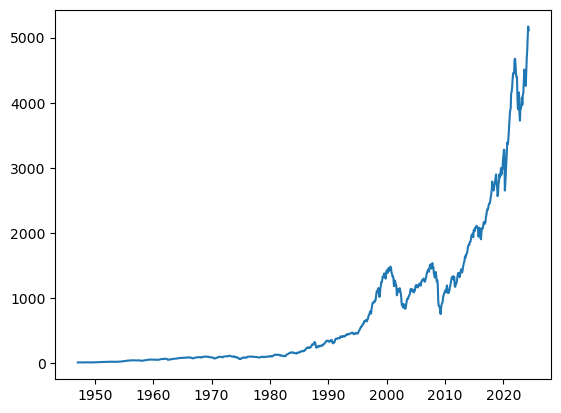

In [13]:
plt.figure()
plt.plot(df["DATE"], df["SP500_full"])
plt.show();

In [14]:
df = df.query("DATE > '1980-01-01'").reset_index(drop=True)

In [15]:
df

,DATE,A091RC1Q027SBEA,CCSA,CORESTICKM159SFRBATL,DEXUSEU,DGS10,DPCCRV1Q225SBEA,FEDFUNDS,FPCPITOTLZGUSA,FYFSGDA188S,...,T10Y2Y,TOTRESNS,UNEMPLOY,UNRATE,VIXCLS,W825RC1,WPU061,WPU0911,WPU10170502,WPU101707
0,1980-01-31,102.252,2781750.0,13.469736,NaN,10.802273,10.2,13.82,13.549202,-2.5839,...,NaN,45.2,6683.0,6.3,NaN,11.8,85.900,94.100,NaN,NaN
1,1980-02-29,102.252,2868500.0,13.599493,NaN,12.414737,10.2,14.13,13.549202,-2.5839,...,NaN,43.2,6702.0,6.3,NaN,11.8,87.300,94.000,NaN,NaN
2,1980-03-31,102.252,2881200.0,14.331667,NaN,12.749048,10.2,17.19,13.549202,-2.5839,...,NaN,43.1,6729.0,6.3,NaN,12.3,88.900,94.100,NaN,NaN
3,1980-04-30,107.264,3126500.0,14.755205,NaN,11.473333,9.2,17.61,13.549202,-2.5839,...,NaN,44.9,7358.0,6.9,NaN,14.2,91.400,101.700,NaN,NaN
4,1980-05-31,107.264,3544800.0,15.115273,NaN,10.181429,9.2,10.98,13.549202,-2.5839,...,NaN,44.0,7984.0,7.5,NaN,15.7,93.200,101.700,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2023-12-31,1025.796,1802400.0,4.554396,1.090940,4.020000,2.0,5.33,4.116338,-6.1903,...,-0.437000,3492.0,6268.0,3.7,12.718500,22.9,300.512,205.776,175.3,413.808
528,2024-01-31,1059.235,1782750.0,4.603922,1.089890,4.058095,3.7,5.33,4.116338,-6.1903,...,-0.264762,3507.0,6124.0,3.7,13.388636,22.6,290.946,209.264,175.3,433.171
529,2024-02-29,1059.235,1797250.0,4.403102,1.079300,4.207500,3.7,5.33,4.116338,-6.1903,...,-0.336500,3567.7,6458.0,3.9,13.980476,22.8,296.303,210.580,175.3,454.090
530,2024-03-31,1059.235,1801400.0,4.509212,1.087019,4.208500,3.7,5.33,4.116338,-6.1903,...,-0.379500,3543.1,6429.0,3.8,13.787500,22.8,298.280,215.883,175.3,396.888


In [16]:
df.fillna(method="ffill", inplace=True)
df.fillna(method="bfill", inplace=True)

In [17]:
df.to_csv("../data/processed/economic_dataset.csv", index=False)